### 1.订单表的长度，shape，columns
### 2.统计菜名的平均价格（amounts）
### 3.什么菜最受欢迎
### 4.哪个订单ID点的菜最多

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1.加载数据

In [4]:
data1 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail1')
data2 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail2')
data3 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail3')
data1.head(5)
data2.head(5)
data3.head(5)

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


### 2.数据预处理（合并sheet以及处理缺失值分析），分析数据

In [3]:
data = pd.concat([data1,data2,data3],axis = 0)#按照行拼接数据
data.head(5)

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


In [5]:
data_clean = data.dropna(axis=1) #按照列删除na列，并且赋值给data_clean
data_clean.info()
data_clean.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442


### 3.统计菜品的平均价格

In [6]:
dishes_count = data_clean['dishes_name'].value_counts()[:10]   #统计并取最大的前十
dishes_count 

dishes_name
白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: count, dtype: int64

### 数据可视化

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


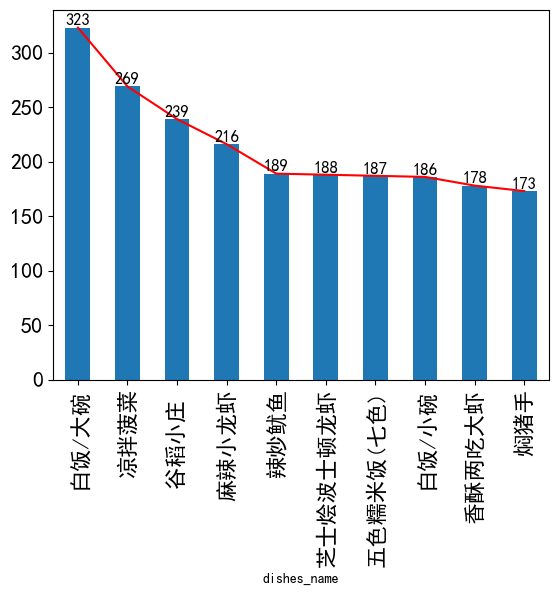

In [9]:
dishes_count.plot(kind='line',color=['r'])#指定图表类型为线形图。
dishes_count.plot(kind='bar',fontsize=16)# 指定图表类型为条形图。
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
for x,y in enumerate(dishes_count):#循环遍历 dishes_count 中的每个元素。
    print(x,y)
    plt.text(x,y+2,y,ha='center',fontsize=12)
#plt.savefig('my_figure.png')  # 保存为 PNG 文件

Text(0, 0.5, '点菜种类')

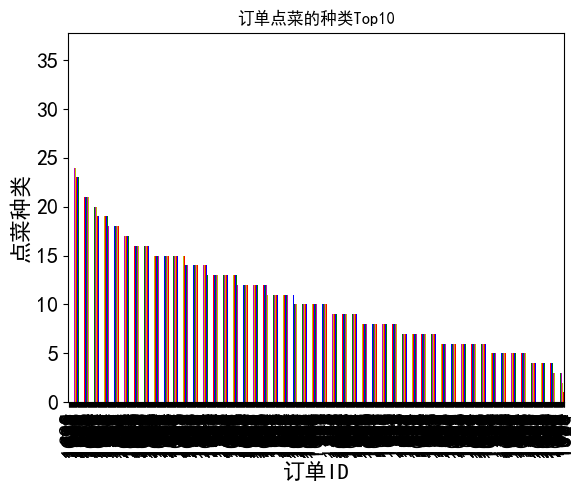

In [10]:
#订单点菜的种类最多（1，1，1    1，2，3）
data_group = data_clean['order_id'].value_counts()[:]
data_group.plot(kind='bar',fontsize=16,color=['r','m','b','y','g'])
plt.title('订单点菜的种类Top10')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)
# 8月份餐厅订单点菜种类前10名，平均点菜25个菜品

Text(0.5, 1.0, '订单ID点菜数量Top10')

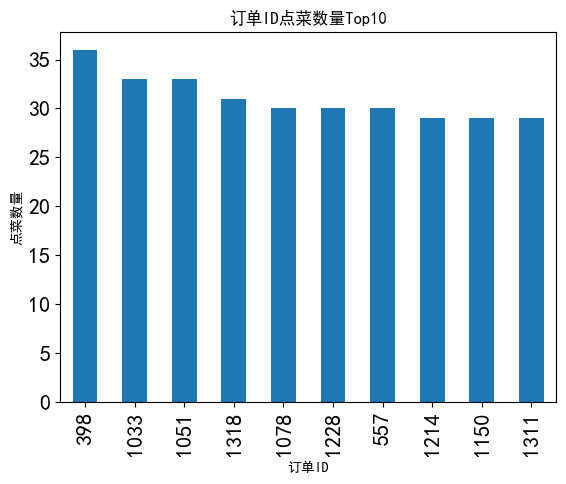

In [11]:
#订单ID点菜数量Top10（分组order_id,counts求和，排序，前十）
data_clean['total_amounts'] =data_clean['counts']*data_clean['amounts']  #统计单道菜消费总额
dataGroup = data_clean[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum()  #分组求和
sort_counts = Group_sum.sort_values(by='counts',ascending=False)
sort_counts['counts'][:10].plot(kind='bar',fontsize=16)
plt.xlabel('订单ID')
plt.ylabel('点菜数量')
plt.title('订单ID点菜数量Top10')
#8月份订单点菜数量前10名

Text(0.5, 1.0, '订单消费单价前10')

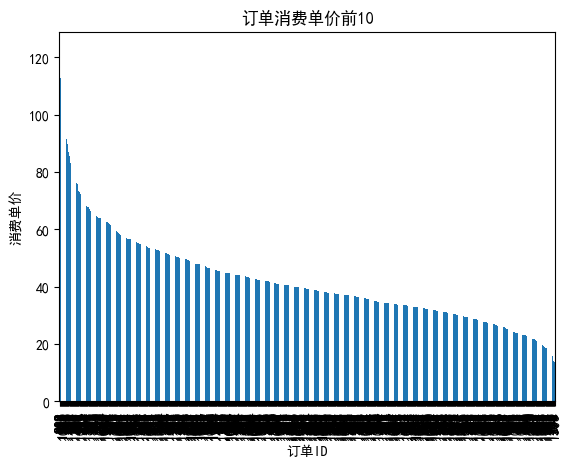

In [21]:
#哪个订单ID平均消费最贵
Group_sum['average'] = Group_sum['total_amounts']/Group_sum['counts']
sort_average = Group_sum.sort_values(by='average',ascending=False)
sort_average['average'][:].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费单价')
plt.title('订单消费单价前10')

C:\Users\陈季超\AppData\Local\Temp\ipykernel_23696\1359128362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['hourcount'] = 1 # 新列，用作计数器
C:\Users\陈季超\AppData\Local\Temp\ipykernel_23696\1359128362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['time'] = pd.to_datetime(data_clean['place_order_time']) #将时间转换成日期类型存储
C:\Users\陈季超\AppData\Local\Temp\ipykernel_23696\1359128362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Text(0.5, 1.0, '点菜数与小时的关系图')

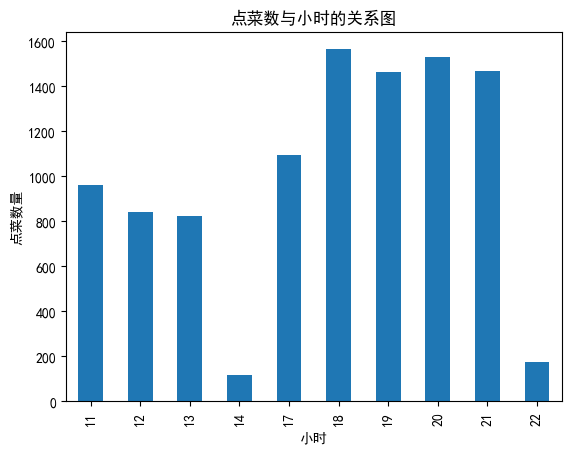

In [17]:
#一天当中什么时间段，点菜量比较集中（hour）
data_clean['hourcount'] = 1 # 新列，用作计数器
data_clean['time'] = pd.to_datetime(data_clean['place_order_time']) #将时间转换成日期类型存储
data_clean['hour'] = data_clean['time'].map(lambda x:x.hour)
gp_by_hour = data_clean.groupby(by='hour').count()['hourcount']
gp_by_hour.plot(kind='bar')
plt.xlabel('小时')
plt.ylabel('点菜数量')
plt.title('点菜数与小时的关系图')

C:\Users\陈季超\AppData\Local\Temp\ipykernel_23696\1783401847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['daycount'] = 1
C:\Users\陈季超\AppData\Local\Temp\ipykernel_23696\1783401847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['day'] = data_clean['time'].map(lambda x:x.day)  #解析出天


Text(0.5, 1.0, '点菜数量与日期的关系图')

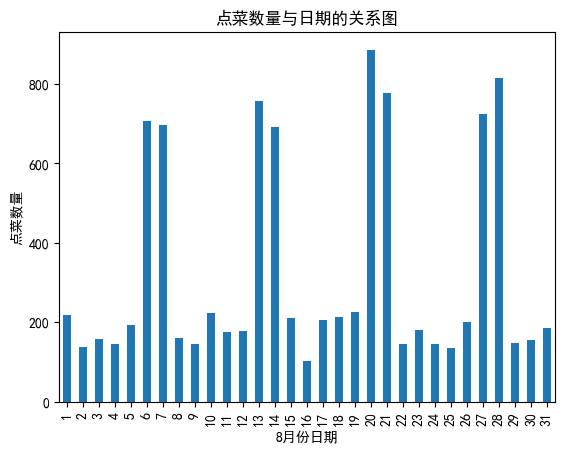

In [18]:
#哪一天订餐数量最多
data_clean['daycount'] = 1  
data_clean['day'] = data_clean['time'].map(lambda x:x.day)  #解析出天
gp_by_day  = data_clean.groupby(by='day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('8月份日期')
plt.ylabel('点菜数量')
plt.title('点菜数量与日期的关系图')
#拓展：排序，取点菜量最大的前5天

C:\Users\陈季超\AppData\Local\Temp\ipykernel_23696\1583985123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['weekcount'] = 1
C:\Users\陈季超\AppData\Local\Temp\ipykernel_23696\1583985123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['weekday'] = data_clean['time'].map(lambda x:x.weekday())


Text(0.5, 1.0, '点菜数量与星期关系图')

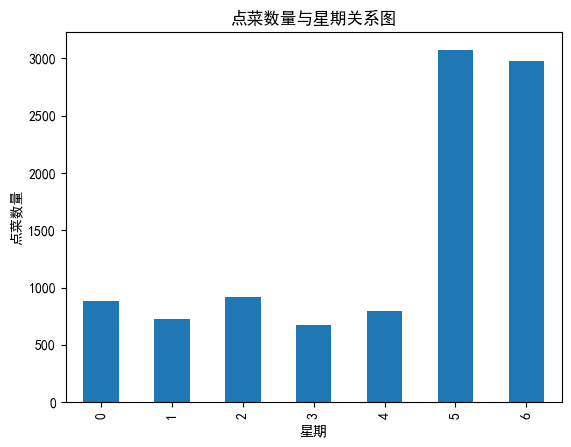

In [20]:
#查看星期几人数最多，订餐数最多，映射数据到星期
data_clean['weekcount'] = 1
data_clean['weekday'] = data_clean['time'].map(lambda x:x.weekday())
gp_by_weekday = data.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')
plt.xlabel('星期')
plt.ylabel('点菜数量')
plt.title('点菜数量与星期关系图')